In [23]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
image_path='image1.jpeg'

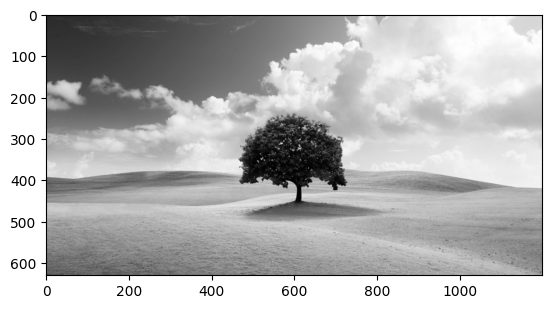

In [25]:
# Load the image
img = Image.open(image_path).convert('L')  # Convert to grayscale
plt.imshow(img,cmap='gray')
plt.show()

In [26]:
pixels = np.array(img)
pixels

array([[ 42,  43,  43, ..., 214, 215, 215],
       [ 42,  43,  43, ..., 215, 215, 215],
       [ 42,  43,  43, ..., 215, 215, 215],
       ...,
       [ 91, 101,  90, ..., 158, 155, 152],
       [ 89,  96,  86, ..., 170, 161, 160],
       [ 87,  85,  72, ..., 169, 161, 163]], dtype=uint8)

In [27]:
# Compute histogram
hist, bins = np.histogram(pixels.flatten(), bins=256, range=[0,256])
print(hist,bins)

[  78  294  388  466  679  775  773  731  800  763  721  714  716  662
  681  695  678  589  643  576  572  536  563  568  509  573  543  505
  456  499  498  416  393  416  392  371  381  359  359  366  353  337
  371  514  792  823 1077 1137 1139 1187 1227 1299 1519 1615 1474 1699
 1744 1831 1862 1727 1902 1839 1817 1811 1820 1893 1728 1828 1814 1770
 1599 1559 1616 1625 1492 1460 1377 1407 1412 1446 1546 1653 1719 1670
 1743 1684 1811 1817 1959 1832 1842 1963 2026 2091 2007 2145 2258 2215
 2212 2319 2352 2392 2561 2494 2623 2792 2682 2661 2765 2732 2927 2833
 2904 2991 2964 3053 3049 2923 2953 3047 2976 2880 2996 3097 2793 2996
 2859 2814 2723 2794 2567 2536 2711 2693 2752 2772 2862 2856 2908 2833
 2973 3102 3007 3288 3194 3315 3300 3443 3482 3550 3519 3642 3583 3722
 3540 3621 3656 3566 3606 3573 3638 3562 3589 3793 3722 3693 3815 3933
 4058 4183 4317 4446 4658 4788 4896 5013 5341 5289 5566 5732 5568 5893
 5937 6072 6286 6519 6651 6705 6283 6418 6365 6300 6325 6016 6008 5862
 5920 

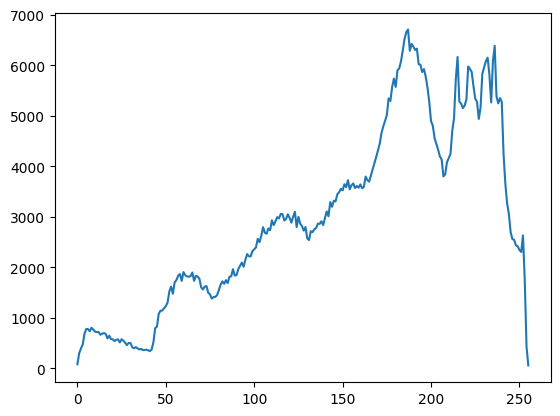

In [28]:
plt.plot(hist)

In [29]:
# Compute cumulative distribution function (CDF)
cdf = hist.cumsum()
print(cdf)

[    78    372    760   1226   1905   2680   3453   4184   4984   5747
   6468   7182   7898   8560   9241   9936  10614  11203  11846  12422
  12994  13530  14093  14661  15170  15743  16286  16791  17247  17746
  18244  18660  19053  19469  19861  20232  20613  20972  21331  21697
  22050  22387  22758  23272  24064  24887  25964  27101  28240  29427
  30654  31953  33472  35087  36561  38260  40004  41835  43697  45424
  47326  49165  50982  52793  54613  56506  58234  60062  61876  63646
  65245  66804  68420  70045  71537  72997  74374  75781  77193  78639
  80185  81838  83557  85227  86970  88654  90465  92282  94241  96073
  97915  99878 101904 103995 106002 108147 110405 112620 114832 117151
 119503 121895 124456 126950 129573 132365 135047 137708 140473 143205
 146132 148965 151869 154860 157824 160877 163926 166849 169802 172849
 175825 178705 181701 184798 187591 190587 193446 196260 198983 201777
 204344 206880 209591 212284 215036 217808 220670 223526 226434 229267
 23224

In [30]:
# Normalize CDF to the range [0, 255]
cdf_normalized = ((cdf - cdf.min()) * 255) / (cdf.max() - cdf.min())
print(cdf_normalized)

[0.00000000e+00 9.91768992e-02 2.30063419e-01 3.87262178e-01
 6.16313588e-01 8.77749292e-01 1.13851032e+00 1.38510322e+00
 1.65497234e+00 1.91236001e+00 2.15557954e+00 2.39643773e+00
 2.63797058e+00 2.86128728e+00 3.09101336e+00 3.32546215e+00
 3.55417622e+00 3.75286736e+00 3.96977466e+00 4.16408042e+00
 4.35703684e+00 4.53784914e+00 4.72776953e+00 4.91937660e+00
 5.09108083e+00 5.28437458e+00 5.46754824e+00 5.63790312e+00
 5.79172851e+00 5.96005937e+00 6.12805289e+00 6.26838483e+00
 6.40095804e+00 6.54128997e+00 6.67352584e+00 6.79867764e+00
 6.92720281e+00 7.04830657e+00 7.16941034e+00 7.29287546e+00
 7.41195520e+00 7.52563757e+00 7.65078937e+00 7.82418027e+00
 8.09135069e+00 8.36897855e+00 8.73228984e+00 9.11584132e+00
 9.50006747e+00 9.90048576e+00 1.03143975e+01 1.07525975e+01
 1.12650115e+01 1.18098097e+01 1.23070436e+01 1.28801781e+01
 1.34684928e+01 1.40861557e+01 1.47142761e+01 1.52968560e+01
 1.59384698e+01 1.65588315e+01 1.71717717e+01 1.77826879e+01
 1.83966401e+01 1.903521

In [31]:
# Map pixels to new intensities using the CDF
equalized_pixels = np.interp(pixels.flatten(), bins[:-1], cdf_normalized)
print(equalized_pixels)
hist2,bins2=np.histogram(equalized_pixels, bins=256, range=[0,256])

[  7.65078937   7.82418027   7.82418027 ... 113.29678856 102.9115504
 105.40176764]


In [32]:
    # Reshape the equalized pixels back to the original image shape
    equalized_image = equalized_pixels.reshape(pixels.shape).astype(np.uint8)
    print(equalized_image)

[[  7   7   7 ... 193 195 195]
 [  7   7   7 ... 195 195 195]
 [  7   7   7 ... 195 195 195]
 ...
 [ 33  41  33 ...  99  95  91]
 [ 32  37  30 ... 114 102 101]
 [ 31  29  23 ... 113 102 105]]


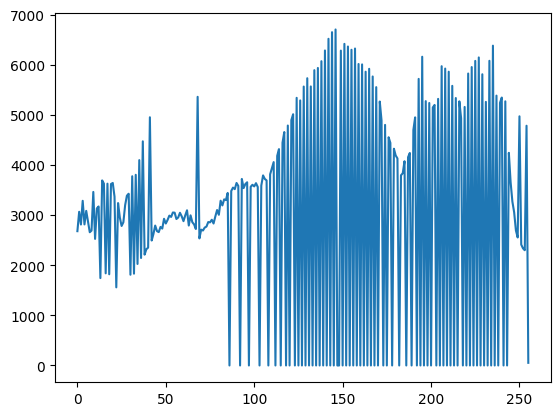

In [33]:
plt.plot(hist2)

In [34]:
    # Display the original and equalized images
    original=img
    processed=Image.fromarray(equalized_image)

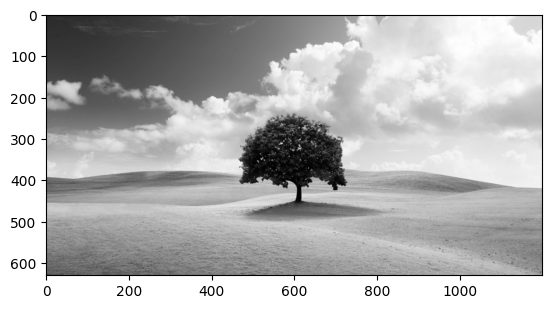

In [35]:
plt.imshow(original,cmap='gray')

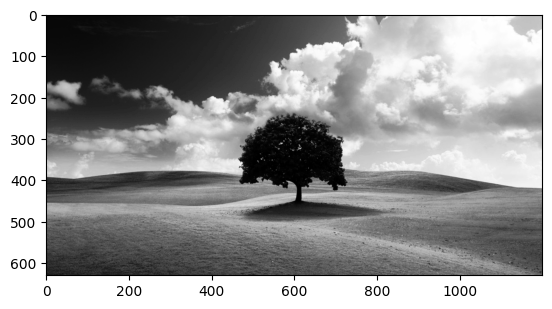

In [36]:
plt.imshow(processed,cmap='gray')

In [37]:
#psnr
def psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    max_pixel_value = 255.0
    return 20 * np.log10(max_pixel_value / np.sqrt(mse))

In [38]:
psnr(pixels,equalized_image)

28.25989549362656

In [39]:
def mse(original, processed):
    return np.mean((original - processed) ** 2)

In [40]:
mse(pixels,equalized_image)

97.07129232804233